# CapStone Project  

* Data for mobiles is scrapped from Snapdeal site
* After creating .csv file Data is Analysed,cleaned and the EDA is performed
* Final Conclusions based on univariate and multivariate analysis age given in last



In [1]:
pip install fake-useragent

In [2]:
import requests                          # Required Libraries
import bs4
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
product=[]                        # initialization of dataframe features
ram=[]
hdd=[]
color=[]
price=[]
discount=[]
rating=[]
count=0

In [4]:
#Fake User Agent
fake_useragent=UserAgent()
print(fake_useragent)

In [5]:
product_name=input("Enter Product Name :")             #input for product name
print(product_name)

Enter Product Name :mobiles
mobiles


In [6]:
url="https://www.snapdeal.com/search?keyword={0}&santizedKeyword=&catId=&categoryId=0&suggested=false&vertical=&noOfResults=20&searchState=&clickSrc=go_header&lastKeyword=&prodCatId=&changeBackToAll=false&foundInAll=false&categoryIdSearched=&cityPageUrl=&categoryUrl=&url=&utmContent=&dealDetail=&sort=rlvncy"
print(url.format(product_name))     

https://www.snapdeal.com/search?keyword=mobiles&santizedKeyword=&catId=&categoryId=0&suggested=false&vertical=&noOfResults=20&searchState=&clickSrc=go_header&lastKeyword=&prodCatId=&changeBackToAll=false&foundInAll=false&categoryIdSearched=&cityPageUrl=&categoryUrl=&url=&utmContent=&dealDetail=&sort=rlvncy


In [7]:
def productname(s):             # user defined function to seprate Product title,
    #print(len(s))              # HDD,RAM,color as they are under one tage in html page
    st=0
    l=s.find(",")
    r=0
    sr=[[]]
    p=""
    i=0
    while i<=3:
        p=s[st:l]
        st=l+1
        l=s.find(",",st,(len(s)+1))
        i=i+1
    #print()
   # print(p)
        sr.append([p])
    return sr

In [8]:
# Scraping data for mobiles from Snapdeal
# Increase range to run for more products
for i in range(1,2):     
    url="https://www.snapdeal.com/search?keyword={0}&santizedKeyword=&catId=&categoryId=0&suggested=false&vertical=&noOfResults=20&searchState=&clickSrc=go_header&lastKeyword=&prodCatId=&changeBackToAll=false&foundInAll=false&categoryIdSearched=&cityPageUrl=&categoryUrl=&url=&utmContent=&dealDetail=&sort=rlvncy"
    url=url.format(product_name)
    page=requests.get(url, headers ={"User_agent": fake_useragent.chrome})
    html=page.content
    page_soup=bs4.BeautifulSoup(html, "html.parser")
    for c in page_soup.find_all('a',{'class':'dp-widget-link noUdLine'}):
        for pt in c.find_all('p',{'class':'product-title'}):# class=product-title')#,attrs={'class':'produt-title'}))#,{'class':'dp-widget-link noUdLine hashAdded'}))
            s=pt.text
            s=s.replace("(",",")
            s=(s.replace(")",","))
            #print(len(s))
            #print(s)
            sp=productname(s)
           
            product.append(sp[1]) 
            hdd.append(sp[2]) 
            ram.append(sp[3]) 
            color.append(sp[4])
        pr=c.find_all('span', attrs={'class':'lfloat product-price'})   
        for span in pr:
            #print(span.text)
            price.append(span.text) #if type(span) == bs4.element.Tag  else price.append('NaN') # Add Rating to list
        dis=c.find_all('div', attrs={'class':'product-discount'})
        for divs in dis:
            s=divs.find('span')
            ds=s.text
            #print(ds[:2])
            #if type(s) != bs4.element.Tag:
             #   discount.append('NaN') # Add Rating to list
            #else:
            discount.append(ds[:2])
        for pt in c.find_all('p',{'class':'product-rating-count'}):
            #print(pt.text)
            if type(pt) == bs4.element.Tag:
                rating.append(pt.text)  
            else: 
                rating.append('NaN') # Add Rating to list
        count=count+1
    data={'ProductName':product,'HDD':hdd,'RAM':ram,'Color':color,'Price':price,'Discount':discount,'Rating':rating}
    df = pd.DataFrame.from_dict(data, orient='index')
    df = df.transpose()
print('No. of rows searched',count)    
print(df)
        
        

No. of rows searched 120
                   ProductName                    HDD                    RAM  \
0                  [Redmi 9A ]               [ 32GB ]               [ 2 GB ]   
1           [Nokia NOKIA 2.3 ]              [ 32 MB ]               [ 2 GB ]   
2                 [Realme C2 ]               [ 32GB ]               [ 2 GB ]   
3                [Xolo Era 2 ]                [ 8GB ]               [ 1 GB ]   
4                  [Redmi 9i ]               [ 64GB ]               [ 4 GB ]   
5             [Redmi Note 7s ]              [ 64 GB ]               [ 4 GB ]   
6            [Lenovo K8 Plus ]               [ 32GB ]               [ 3 GB ]   
7              [itel A25 pro ]               [ 32GB ]               [ 2 GB ]   
8        [Micromax X419  Blac]  [Micromax X419  Blac]  [Micromax X419  Blac]   
9                  [Realme 7 ]               [ 64GB ]               [ 6 GB ]   
10      [Coolpad Note 3 Plus ]               [ 16GB ]               [ 3 GB ]   
11             

In [9]:
# checking dataframe
df.shape
df.head()

,ProductName,HDD,RAM,Color,Price,Discount,Rating
0,[Redmi 9A ],[ 32GB ],[ 2 GB ],[ Gree],"Rs. 7,799",3%,(18)
1,[Nokia NOKIA 2.3 ],[ 32 MB ],[ 2 GB ],[ Gree],"Rs. 8,999",10,(2)
2,[Realme C2 ],[ 32GB ],[ 2 GB ],[ Blu],"Rs. 8,199",9%,(52)
3,[Xolo Era 2 ],[ 8GB ],[ 1 GB ],[ Pyramid Gol],"Rs. 4,482",15,(9254)
4,[Redmi 9i ],[ 64GB ],[ 4 GB ],[ Blu],"Rs. 8,999",10,(8)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductName  60 non-null     object
 1   HDD          60 non-null     object
 2   RAM          60 non-null     object
 3   Color        60 non-null     object
 4   Price        60 non-null     object
 5   Discount     59 non-null     object
 6   Rating       47 non-null     object
dtypes: object(7)
memory usage: 3.4+ KB


In [11]:
df.describe()

,ProductName,HDD,RAM,Color,Price,Discount,Rating
count,60,60,60,60,60,59,47
unique,36,14,9,24,32,25,18
top,[Realme C11 ],[ 32GB ],[ 4 GB ],[ Gree],"Rs. 7,990",10,(1)
freq,3,14,16,8,6,7,7


In [12]:
df.isnull().sum()

ProductName     0
HDD             0
RAM             0
Color           0
Price           0
Discount        1
Rating         13
dtype: int64

In [13]:
#df['ProductName'] = df['ProductName'].str.lstrip('[') # lstrip cut str from left 
#df['ProductName'] = df['ProductName'].rstrip.str(']') # lstrip cut str from left 
#df['HDD'] = df['HDD'].str.lstrip('[') # lstrip cut str from left 
#df['HDD'] = df['HDD'].str.rstrip(']') # lstrip cut str from left 
#df['RAM'] = df['RAM'].str.lstrip('[') # lstrip cut str from left 
#df['RAM'] = df['RAM'].str.rstrip(']') # lstrip cut str from left 
df['Price'] = df['Price'].str.lstrip('Rs.') # lstrip cut str from left 
df['Price'] = df['Price'].replace({',' : ''}, regex=True)  #regex is regular exp it replace only , with space
df['Discount'] = df['Discount'].str.rstrip('%') # lstrip cut str from left 
df['Rating'] = df['Rating'].str.lstrip('(') # lstrip cut str from left 
df['Rating'] = df['Rating'].str.rstrip(')') # lstrip cut str from left 





In [14]:
print(df.head())
df.dtypes

          ProductName        HDD       RAM           Color   Price Discount  \
0         [Redmi 9A ]   [ 32GB ]  [ 2 GB ]         [ Gree]    7799        3   
1  [Nokia NOKIA 2.3 ]  [ 32 MB ]  [ 2 GB ]         [ Gree]    8999       10   
2        [Realme C2 ]   [ 32GB ]  [ 2 GB ]          [ Blu]    8199        9   
3       [Xolo Era 2 ]    [ 8GB ]  [ 1 GB ]  [ Pyramid Gol]    4482       15   
4         [Redmi 9i ]   [ 64GB ]  [ 4 GB ]          [ Blu]    8999       10   

  Rating  
0     18  
1      2  
2     52  
3   9254  
4      8  


ProductName    object
HDD            object
RAM            object
Color          object
Price          object
Discount       object
Rating         object
dtype: object

In [15]:
# converting features price, discount and rating to float
for i in range(4,7,1):
    df.iloc[:,i]= df.iloc[:,i].astype(float).copy()
df.dtypes

ProductName     object
HDD             object
RAM             object
Color           object
Price          float64
Discount       float64
Rating         float64
dtype: object

In [16]:
df.describe(include="all")

,ProductName,HDD,RAM,Color,Price,Discount,Rating
count,60,60,60,60,60.000000,59.000000,47.000000
unique,36,14,9,24,NaN,NaN,NaN
top,[Realme C11 ],[ 32GB ],[ 4 GB ],[ Gree],NaN,NaN,NaN
freq,3,14,16,8,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,10731.366667,20.033898,537.319149
std,NaN,NaN,NaN,NaN,7045.924161,13.607764,1927.030212
min,NaN,NaN,NaN,NaN,1295.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,7034.000000,10.000000,5.000000
50%,NaN,NaN,NaN,NaN,8649.000000,17.000000,13.000000
75%,NaN,NaN,NaN,NaN,12117.250000,27.000000,67.500000


In [17]:
# recorded dataframe in .csv file
df.to_csv('mobilewebscraping.csv',index=False)

In [29]:
data=pd.read_csv('mobilewebscraping.csv')
data.head()

,ProductName,HDD,RAM,Color,Price,Discount,Rating
0,['Redmi 9A '],[' 32GB '],[' 2 GB '],[' Gree'],7799.0,3.0,18.0
1,['Nokia NOKIA 2.3 '],[' 32 MB '],[' 2 GB '],[' Gree'],8999.0,10.0,2.0
2,['Realme C2 '],[' 32GB '],[' 2 GB '],[' Blu'],8199.0,9.0,52.0
3,['Xolo Era 2 '],[' 8GB '],[' 1 GB '],[' Pyramid Gol'],4482.0,15.0,9254.0
4,['Redmi 9i '],[' 64GB '],[' 4 GB '],[' Blu'],8999.0,10.0,8.0


In [30]:
data.describe(include='all')

,ProductName,HDD,RAM,Color,Price,Discount,Rating
count,60,60,60,60,60.000000,59.000000,47.000000
unique,36,14,9,24,NaN,NaN,NaN
top,['Coolpad Note 3 Plus '],[' 32GB '],[' 4 GB '],[' Gree'],NaN,NaN,NaN
freq,3,14,16,8,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,10731.366667,20.033898,537.319149
std,NaN,NaN,NaN,NaN,7045.924161,13.607764,1927.030212
min,NaN,NaN,NaN,NaN,1295.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,7034.000000,10.000000,5.000000
50%,NaN,NaN,NaN,NaN,8649.000000,17.000000,13.000000
75%,NaN,NaN,NaN,NaN,12117.250000,27.000000,67.500000


# Analysing Null values

In [31]:
data.isnull().sum()

ProductName     0
HDD             0
RAM             0
Color           0
Price           0
Discount        1
Rating         13
dtype: int64

<AxesSubplot:>

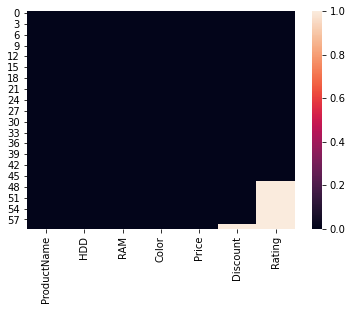

In [32]:
sbn.heatmap(data.isnull(),cbar=True)

In [22]:
# Rows where Discount is null
print('Missing Discount % :{0:.2f}'.format(data.Discount.isnull().sum()/len(data)*100))  #percetage of null values in Age column
print("###################################################################")
print("Rows with Disount as NULL")
dfn=data[data.Discount.isnull()]
print(dfn)
print("###################################################################")
print('Missing Rating % :{0:.2f}'.format(data.Rating.isnull().sum()/len(data)*100))   #percetage of null values in Embarked column
print("###################################################################")
print("Rows with Rating as NULL")
dfn=data[data.Rating.isnull()]
print(dfn)
print("###################################################################")

Missing Discount % :1.67
###################################################################
Rows with Disount as NULL
            ProductName         HDD         RAM      Color   Price  Discount  \
59  ['Lenovo K8 Plus ']  [' 32GB ']  [' 3 GB ']  [' Blac']  7990.0       NaN   

    Rating  
59     NaN  
###################################################################
Missing Rating % :21.67
###################################################################
Rows with Rating as NULL
                   ProductName                      HDD  \
47  ['Lenovo Lenovo K8 Plus ']          ['Venom Black']   
48          ['Redmi Note 7s ']              [' 64 GB ']   
49          ['INFINIX Hot 7 ']               [' 64GB ']   
50               ['Nokia C3 ']               [' 16GB ']   
51           ['itel A25 pro ']               [' 32GB ']   
52    ['Coolpad Note 3 Plus ']               [' 16GB ']   
53          ['Redmi 9 Power ']              [' 128GB ']   
54     ['Micromax X419  Blac']  ['Mic

<AxesSubplot:xlabel='Discount', ylabel='Count'>

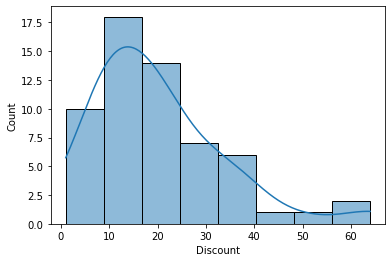

In [33]:
sbn.histplot(data.Discount,kde=True)

0


<AxesSubplot:xlabel='Discount', ylabel='Count'>

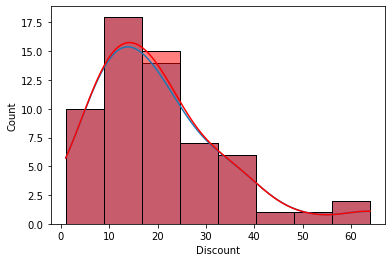

In [34]:
data['NewDiscount']=data.Discount.fillna(data.Discount.mean())
data.head()
print(data.NewDiscount.isnull().sum())
sbn.histplot(data.Discount,kde=True)
sbn.histplot(data.NewDiscount,kde=True,color="red")

# The skewness of Discount(Blue) and NewDiscount(Red) is not much varied, distibution is retained so we go with this imputation

<AxesSubplot:xlabel='Rating', ylabel='Count'>

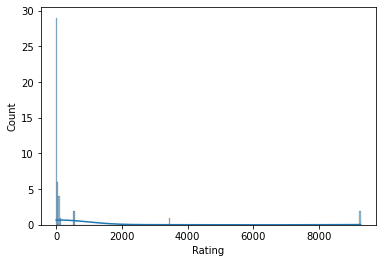

In [35]:
# Filling missing values in Rating column
sbn.histplot(data.Rating,kde=True)

In [36]:
# Most of the mobiles are having rating 1
# Rating is categorical column, so we fill null values with mod value
print(data.Rating.mode())
data.info()


0    1.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  60 non-null     object 
 1   HDD          60 non-null     object 
 2   RAM          60 non-null     object 
 3   Color        60 non-null     object 
 4   Price        60 non-null     float64
 5   Discount     59 non-null     float64
 6   Rating       47 non-null     float64
 7   NewDiscount  60 non-null     float64
dtypes: float64(4), object(4)
memory usage: 3.9+ KB


In [37]:
m=data.Rating.mode()
print(m)
data['NewRating']=data.Rating.fillna(1.0)
data.info()

0    1.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  60 non-null     object 
 1   HDD          60 non-null     object 
 2   RAM          60 non-null     object 
 3   Color        60 non-null     object 
 4   Price        60 non-null     float64
 5   Discount     59 non-null     float64
 6   Rating       47 non-null     float64
 7   NewDiscount  60 non-null     float64
 8   NewRating    60 non-null     float64
dtypes: float64(5), object(4)
memory usage: 4.3+ KB


In [38]:
#Drop  Discount and Rating which are having null values
data.drop(['Discount','Rating'],inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  60 non-null     object 
 1   HDD          60 non-null     object 
 2   RAM          60 non-null     object 
 3   Color        60 non-null     object 
 4   Price        60 non-null     float64
 5   NewDiscount  60 non-null     float64
 6   NewRating    60 non-null     float64
dtypes: float64(3), object(4)
memory usage: 3.4+ KB


# Treating outliers
### Numeric Columns

<AxesSubplot:>

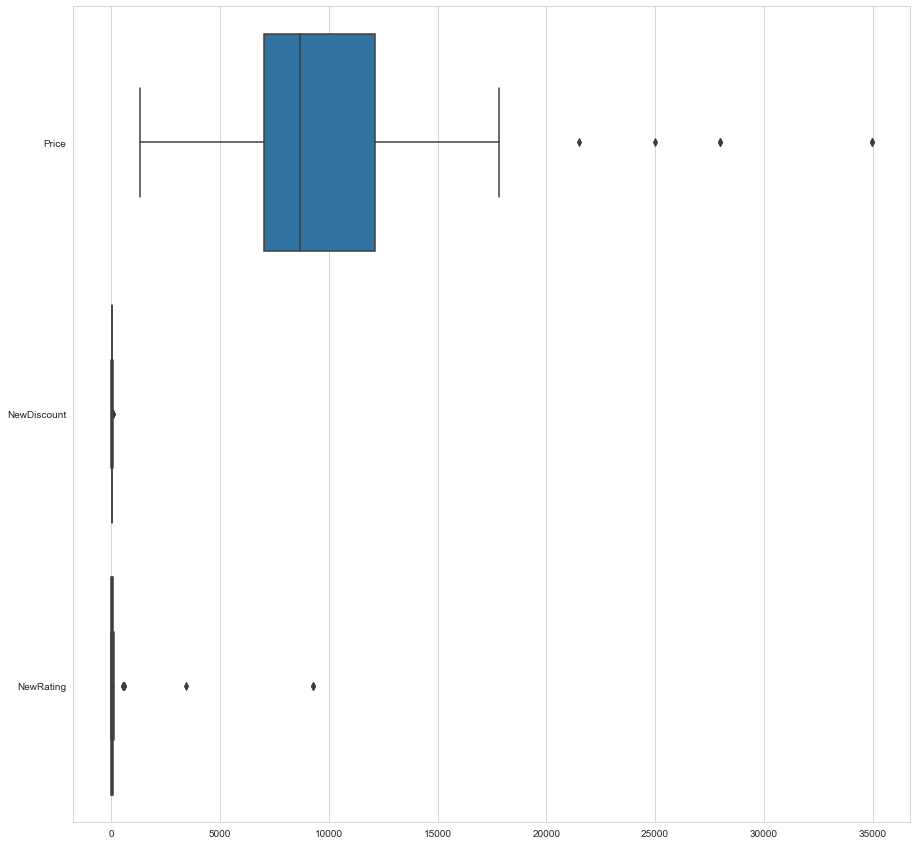

In [39]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,15))
sbn.boxplot(data=data,orient='h')


In [40]:
# Printing outliers for price 
# Printing the rows where price >18000
print(data[data.Price>18000])

                 ProductName          HDD         RAM               Color  \
13       ['Oppo Reno3 Pro ']  [' 256GB ']  [' 8 GB ']  [' Midnight Blac']   
15  ['Blackberry Passport ']   [' 32GB ']  [' 3 GB ']           [' Blac']   
32      ['Oppo Reno 4 Pro ']  [' 128GB ']  [' 8 GB ']    [' Starry Nigh']   
37      ['Oppo Reno 4 Pro ']  [' 128GB ']  [' 8 GB ']     [' Silky Whit']   
44         ['Oppo F19 Pro ']  [' 128GB ']  [' 8 GB ']     [' Fluid Blac']   
58       ['Oppo Reno3 Pro ']  [' 256GB ']  [' 8 GB ']  [' Midnight Blac']   

      Price  NewDiscount  NewRating  
13  27990.0         22.0     3429.0  
15  24999.0          8.0        1.0  
32  34990.0         21.0     9254.0  
37  34990.0         30.0      103.0  
44  21490.0         11.0        5.0  
58  27990.0         20.0        1.0  


In [51]:
# Droping rows with different data
print(data.HDD.unique())
#data['RAM']=data.RAM.fillna("[1 GB]",inplace=True,axis=0)
data=data[data.HDD !="['4GB RAM']"]
#data.drop(data.HDD["32 GB"],inplace=True,axis=0)
data.shape


["[' 32GB ']" "[' 32 MB ']" "[' 8GB ']" "[' 64GB ']" "[' 16GB ']"
 "[' 256GB ']" "[' 128GB ']" "['4GB RAM']" "[' 64 MB ']" "[' 2 GB ']"]


(49, 7)

In [52]:
data.HDD.unique()

array(["[' 32GB ']", "[' 32 MB ']", "[' 8GB ']", "[' 64GB ']",
       "[' 16GB ']", "[' 256GB ']", "[' 128GB ']", "[' 64 MB ']",
       "[' 2 GB ']"], dtype=object)

In [53]:
print(data.RAM.unique())
data.shape

["[' 2 GB ']" "[' 1 GB ']" "[' 4 GB ']" "[' 3 GB ']" "[' 6 GB ']"
 "[' 8 GB ']"]


(49, 7)

- Outliers seems to exist in price column  
- But we cannot cosider them outliers because their are mobile phones in this price range

# Exploratory Data Analysis

In [54]:
data.describe(include="all")

,ProductName,HDD,RAM,Color,Price,NewDiscount,NewRating
count,49,49,49,49,49.000000,49.000000,49.000000
unique,31,9,6,21,NaN,NaN,NaN
top,['Coolpad Note 3 Plus '],[' 32GB '],[' 2 GB '],[' Gree'],NaN,NaN,NaN
freq,3,14,15,8,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11449.959184,20.306814,489.897959
std,NaN,NaN,NaN,NaN,7348.836847,13.741959,1892.673982
min,NaN,NaN,NaN,NaN,4482.000000,3.000000,1.000000
25%,NaN,NaN,NaN,NaN,7799.000000,10.000000,1.000000
50%,NaN,NaN,NaN,NaN,8999.000000,17.000000,6.000000
75%,NaN,NaN,NaN,NaN,12990.000000,25.000000,59.000000


- Inference : In traning Data set:
* Coolpad Note 3 Plus is most buyed mobile 
* Hard Disk prefered is 32GB
* RAM most frequently buyed is 2GB 
* Most preferd color is Green
* Mobiles in range of Rs.10000-12000 range are mostly buyed  

#### Taget variable in this data set is price 

### Analyse the relation between target variables and the categorical variables in the dataset
### The categorical variables considered are HDD,RAM,Color

<AxesSubplot:xlabel='Price', ylabel='count'>

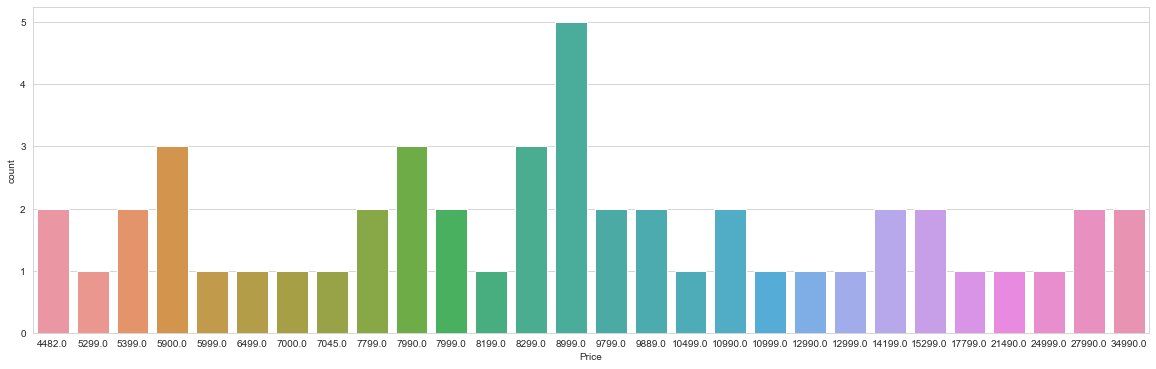

In [55]:
plt.figure(figsize=(20,6))
sbn.countplot(x='Price',data=data)   #factorplot()


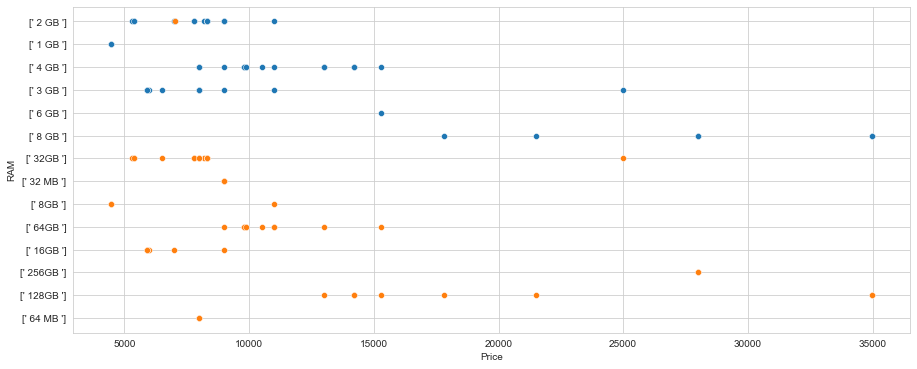

In [68]:
plt.figure(figsize=(15,6))
sbn.scatterplot(x='Price',y='RAM',data=data)   
sbn.scatterplot(x='Price',y='HDD',data=data)
plt.show()

In [ ]:
# Most Prefered Mobiles are having 2Gb or 6GB Ram and 32 GB to 64 Gb HDD 

["[' Gree']" "[' Blu']" "[' Pyramid Gol']" "[' Blac']" "[' Mist Blu']"
 "[' Gol']" "[' Rich Gre']" "[' Champagn']" "[' Midnight Blac']"
 "[' Silve']" "[' Carbon Blac']" "[' Aurora Blu']" "[' Rich Gree']"
 "[' Purpl']" "[' Starry Nigh']" "[' Aqua Blu']" "[' White Gol']"
 "[' Whit']" "[' Silky Whit']" "[' Fluid Blac']" "[' Sand Gol']"]


([<matplotlib.patches.Wedge at 0x3e78d20c40>,
 [Text(0.958450580208442, 0.539789297131854, "[' Gree']"),
  Text(0.10562532954450657, 1.0949170241432062, "[' Blu']"),
  Text(-0.7395309979586672, 0.81430577982614, "[' Pyramid Gol']"),
  Text(-1.0797150772102193, 0.21027446836202016, "[' Blac']"),
  Text(-1.0797150698274751, -0.2102745062708528, "[' Mist Blu']"),
  Text(-0.9910657507028898, -0.47727212131415947, "[' Gol']"),
  Text(-0.837590551992046, -0.7130512374392599, "[' Rich Gre']"),
  Text(-0.6293283280737275, -0.9021894787038514, "[' Champagn']"),
  Text(-0.37990156750686266, -1.0323152614418858, "[' Midnight Blac']"),
  Text(-0.10562534235869807, -1.0949170229070366, "[' Silve']"),
  Text(0.17555986508468452, -1.0858999649007488, "[' Carbon Blac']"),
  Text(0.3799015373030086, -1.032315272557183, "[' Aurora Blu']"),
  Text(0.5087920953891228, -0.9752592494662873, "[' Rich Gree']"),
  Text(0.6293283016771415, -0.9021894971169666, "[' Purpl']"),
  Text(0.7395309550732105, -0.814305

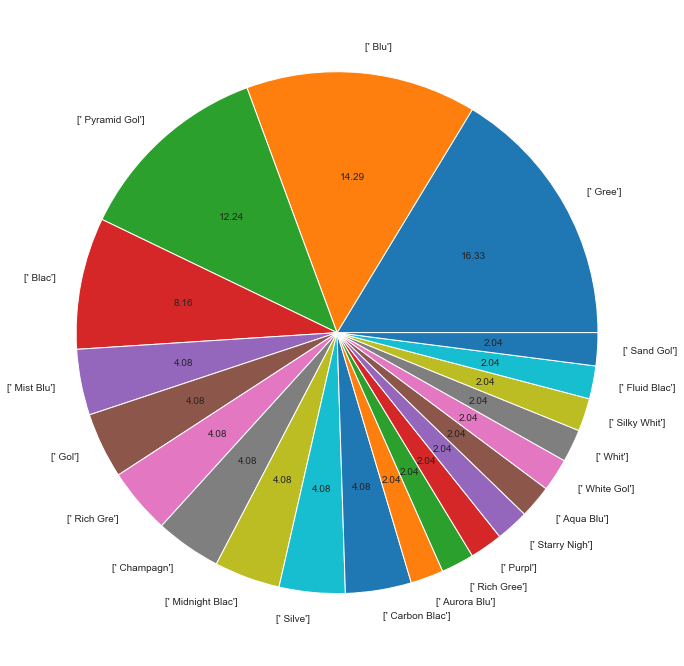

In [74]:
#check relation between color and price
#print('Value counts of :\n', data.Embarked.value_counts())
plt.figure(figsize=(12,12))
s=data['Color'].unique()    #gives the categories in a categorical variable
print(s)
plt.pie(data['Color'].value_counts(),autopct='%.2f',labels=s)

In [ ]:
# Top famous color in mobile phones are Green,Blue,Pyramid Gold 

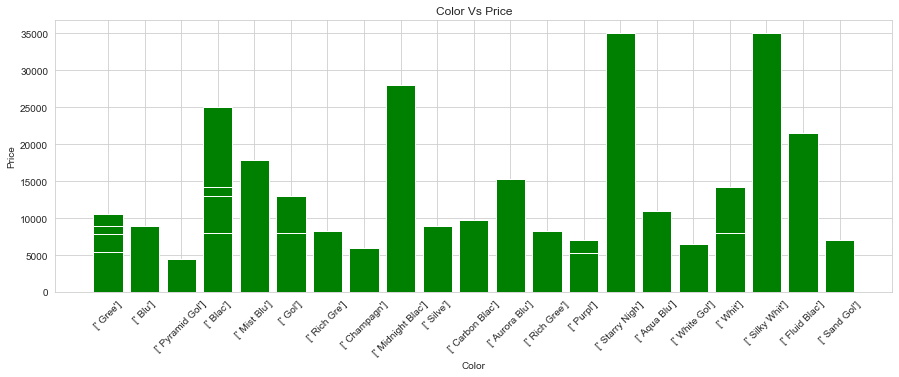

In [85]:
#plt.figure(figsize=(12,12))
#sbn.barplot(x='Color',y='Price',data=data,orient="v")
plt.figure(figsize=(15,5))
plt.bar(data['Color'],data['Price'],color='green')
plt.xticks(rotation=45)   # rotate 
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Color Vs Price')
plt.show()


In [86]:
# Their is no Pattern in the graph so we can say that color has no effect on Price

In [ ]:
# Analysing the Numeric features and Target feature

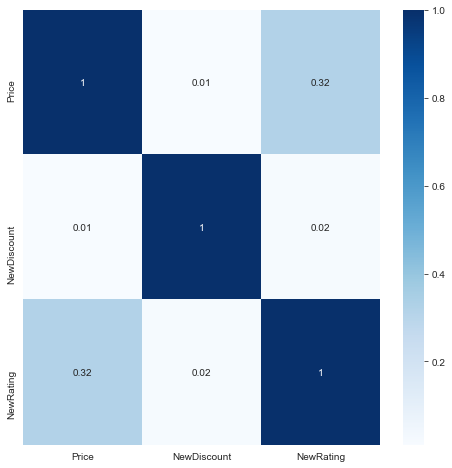

In [87]:
plt.figure(figsize = (8, 8))
sbn.heatmap(data.corr().abs(), annot = True, cmap="Blues")
plt.show()

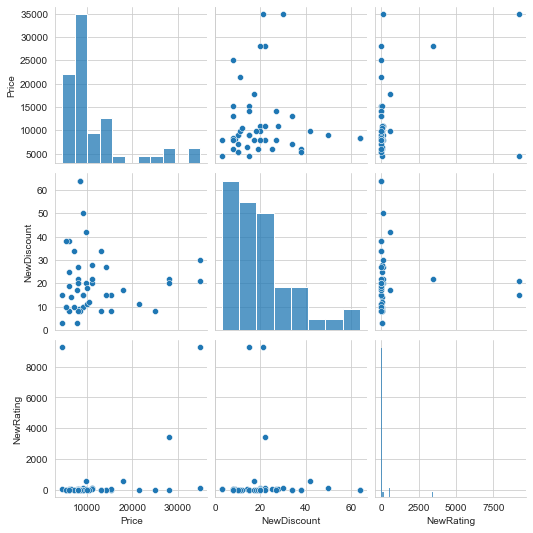

In [89]:
sbn.pairplot(data=data)

In [90]:
# We can see their is some pattern between Price and Discount

<AxesSubplot:xlabel='NewDiscount', ylabel='Count'>

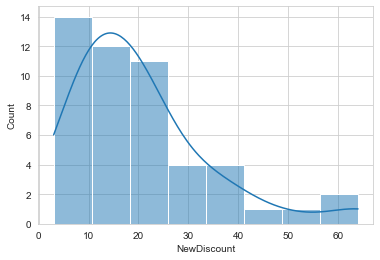

In [92]:
sbn.histplot(data=data.NewDiscount,kde=True)

In [93]:
# Most companies are providing less than 30% discount

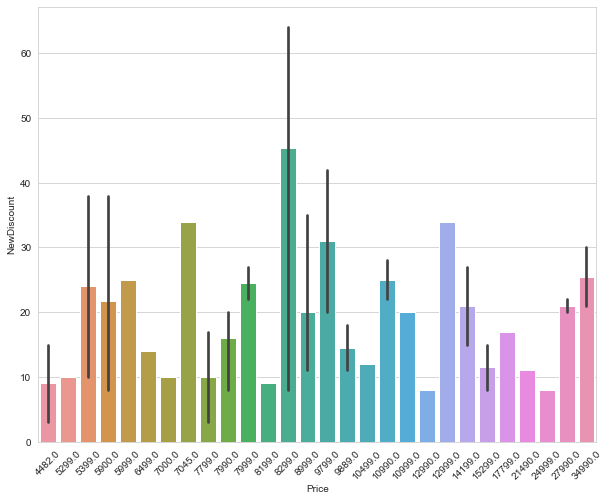

In [106]:
plt.figure(figsize=(10,8))
sbn.barplot(x="Price",y="NewDiscount",data=data)
plt.xticks(rotation=45)
plt.show()


In [107]:
# Discount is more in Mobiles rage Rs 8299 to Rs 9799

<AxesSubplot:xlabel='NewRating'>

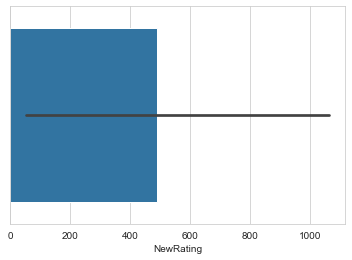

In [124]:
sbn.barplot(x=data.NewRating)

In [139]:
m=data.Price.max()
print('Highest Price Mobiles :',data[data.Price==m])
n=data.Price.min()
print('Lowest Price Mobiles:', data[data.Price==n])
print('Average price of mobiles is :', data['Price'].mean())

Highest Price Mobiles :              ProductName          HDD         RAM             Color    Price  \
32  ['Oppo Reno 4 Pro ']  [' 128GB ']  [' 8 GB ']  [' Starry Nigh']  34990.0   
37  ['Oppo Reno 4 Pro ']  [' 128GB ']  [' 8 GB ']   [' Silky Whit']  34990.0   

    NewDiscount  NewRating  
32         21.0     9254.0  
37         30.0      103.0  
Lowest Price Mobiles:         ProductName        HDD         RAM             Color   Price  \
3   ['Xolo Era 2 ']  [' 8GB ']  [' 1 GB ']  [' Pyramid Gol']  4482.0   
41  ['Xolo Era 2 ']  [' 8GB ']  [' 1 GB ']  [' Pyramid Gol']  4482.0   

    NewDiscount  NewRating  
3          15.0     9254.0  
41          3.0       59.0  
Average price of mobiles is : 11449.959183673469


# Final Conclusion
* Coolpad Note 3 Plus is most purchased mobile
* Hard Disk preferred is 32GB
* RAM preference is 2GB
* Most preferred color is Green
* Mobiles in range of Rs.10000-12000 range are mostly purchased
* Most Preferred Mobiles are having 2Gb or 4GB Ram and 32 GB to 64 GB HDD
* Top famous color in mobile phones are Green, Blue,Pyramid Gold
* Most companies are providing less than 30% discount
* Discount is more in Mobiles rage Rs 8299 to Rs 9799
